In [1]:
#import the numpy and pandas library
import numpy as np
import pandas as pd

In [2]:
# read Flipkart csv file using pandas's read_csv function and store into df variable.

df = pd.read_csv("flipkart.csv", encoding = "ISO-8859-1")

In [3]:
# check all columns of data
df.head()

,ProductName,Price,Rate,Review,Summary
0,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Excellent,A goo show case thanks to Flipkart
1,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Perfect product!,Awesome
2,@Home by nilkamal Walton Engineered Wood TV En...,11999,1,Terrible product,Don't bay this one.
3,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Great product,Excellent
4,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Perfect product!,Excellent product..... Fully satisfied


In [4]:
# Select Summary columns from the filekart files and store into summary variable
summary = df.Summary

In [5]:
# select intial 5 records using head() function to view feedback
summary.head()

0        A goo show case thanks to Flipkart
1                                   Awesome
2                       Don't bay this one.
3                                 Excellent
4    Excellent product..... Fully satisfied
Name: Summary, dtype: object

In [6]:
# Total Number of feedback for differenct products.
len(summary) 

11613

In [7]:
# Import nltk (Natural Language Toolkit) library to tokenize words and sentence, stemming , to reomove stopwords
import nltk
#import word tokenize function from nltk.tokenize that splits a given sentence into words
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

#Import PortStemmer function from nltk.stem to root words
#from nltk.stem import PorterStemmer
#word_stemer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sales.co\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#Import WordNetLemmatizer class from nltk.stem to root words which 
#Lemmatization considers the context and converts the word to its meaningful base form. It is more appropriate than PortStemmer
# and higher accuracy than stemming for context analysis.
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
#import WordNetLemmatizer function 
lemtizer = WordNetLemmatizer()

nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sales.co\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sales.co\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
#import FreqDist Function to calcuate frequency of words
from nltk.probability import FreqDist

In [10]:
#create loop and store a splitted text from sentence of summary columns which contain feedback of all products.
token=[]

for line in summary:
    token += nltk.wordpunct_tokenize(line)
 

In [11]:
print(token)

['A', 'goo', 'show', 'case', 'thanks', 'to', 'Flipkart', 'Awesome', 'Don', "'", 't', 'bay', 'this', 'one', '.', 'Excellent', 'Excellent', 'product', '.....', 'Fully', 'satisfied', 'excellent', 'product', '.', 'i', 'm', 'happy', 'to', 'have', 'this', 'product', '.', 'my', 'drawing', 'room', 'become', 'more', 'beautiful', 'by', 'this', '.', 'thanks', 'to', 'flipkart', 'excellent', 'product', '.', 'look', 'and', 'quality', 'is', 'good', '.', 'Except', 'the', 'height', 'of', 'the', 'unit', 'everything', 'looks', 'good', 'Fine', 'Good', 'good', 'product', 'Good', 'product', 'good', 'product', 'I', 'love', 'it', 'good', 'product', '.', 'good', 'product', '...', 'good', 'service', '...', 'best', 'overall', 'Good', 'quality', 'and', 'good', 'installation', 'thanks', 'a', 'lot', '.........', 'Highly', 'recommended', 'product', 'as', 'itâ', '\x80\x99', 's', 'very', 'nice', 'and', 'looks', 'good', '....', 'worth', 'for', 'the', 'money', '..', 'Horrible', 'no', 'installation', 'yet', 'date', 'all'

In [12]:
#novermalize the words means convert all text or charachter into lowercase ans store into words list.
words = [w.lower() for w in token]

print(words)

['a', 'goo', 'show', 'case', 'thanks', 'to', 'flipkart', 'awesome', 'don', "'", 't', 'bay', 'this', 'one', '.', 'excellent', 'excellent', 'product', '.....', 'fully', 'satisfied', 'excellent', 'product', '.', 'i', 'm', 'happy', 'to', 'have', 'this', 'product', '.', 'my', 'drawing', 'room', 'become', 'more', 'beautiful', 'by', 'this', '.', 'thanks', 'to', 'flipkart', 'excellent', 'product', '.', 'look', 'and', 'quality', 'is', 'good', '.', 'except', 'the', 'height', 'of', 'the', 'unit', 'everything', 'looks', 'good', 'fine', 'good', 'good', 'product', 'good', 'product', 'good', 'product', 'i', 'love', 'it', 'good', 'product', '.', 'good', 'product', '...', 'good', 'service', '...', 'best', 'overall', 'good', 'quality', 'and', 'good', 'installation', 'thanks', 'a', 'lot', '.........', 'highly', 'recommended', 'product', 'as', 'itâ', '\x80\x99', 's', 'very', 'nice', 'and', 'looks', 'good', '....', 'worth', 'for', 'the', 'money', '..', 'horrible', 'no', 'installation', 'yet', 'date', 'all'

In [13]:
#set English stopwords into stop_words variable
stop_words = set(stopwords.words('english'))

In [14]:
#filtered out all stopwords which are insignificant for text analysis
filtered_words = [wd for wd in words if not wd in stop_words]

In [15]:
# import Regular Expression Library for text cleaning
import re 
# import string library function 
import string 

In [16]:
# The code creates a translation table that maps all punctuation characters to spaces. 
#This translation table can be used with the translate() method of a string to remove punctuation from 
#the string by replacing them with spaces.

table = str.maketrans(' ', ' ', string.punctuation)
cleaned_tokens = [w.translate(table) for w in filtered_words]

In [17]:
print(cleaned_tokens[:20])

['goo', 'show', 'case', 'thanks', 'flipkart', 'awesome', '', 'bay', 'one', '', 'excellent', 'excellent', 'product', '', 'fully', 'satisfied', 'excellent', 'product', '', 'happy']


In [18]:
# create a loop to extract words text only using "re.sub" function. Other than text, replace by "" .
words_text_only=[]

for text in cleaned_tokens:
    words_text_only += [re.sub("[^a-zA-Z]", "", text)]

In [19]:
# Lemtize the words means root form of words
stemmed_words = []
for word in words_text_only:
        word = lemtizer.lemmatize(word)
        stemmed_words.append(word)

In [20]:
# count the frequency of each lemmatized word.
fdist1 = FreqDist(stemmed_words)
fdist1

FreqDist({'': 22079, 'good': 4474, 'product': 4265, 'nice': 1920, 'quality': 1025, 'best': 1019, 'money': 698, 'price': 644, 'buy': 619, 'awesome': 607, ...})

In [21]:
#check number words
len(fdist1)

5538

In [22]:
#check most common words
print(fdist1.most_common(50))

[('', 22079), ('good', 4474), ('product', 4265), ('nice', 1920), ('quality', 1025), ('best', 1019), ('money', 698), ('price', 644), ('buy', 619), ('awesome', 607), ('laptop', 594), ('flipkart', 557), ('one', 519), ('use', 510), ('performance', 505), ('go', 504), ('value', 423), ('bad', 407), ('battery', 397), ('excellent', 396), ('also', 392), ('working', 386), ('day', 381), ('great', 369), ('seed', 367), ('time', 366), ('super', 356), ('apple', 355), ('amazing', 322), ('like', 316), ('really', 310), ('fan', 301), ('work', 283), ('delivery', 278), ('easy', 276), ('happy', 273), ('worth', 272), ('ipad', 271), ('installation', 260), ('fast', 259), ('using', 259), ('thanks', 255), ('heating', 249), ('get', 235), ('much', 234), ('range', 230), ('well', 226), ('ok', 225), ('look', 215), ('heat', 208)]


In [23]:
# remove "" by using del function.
del fdist1['']

In [24]:
fdist1

FreqDist({'good': 4474, 'product': 4265, 'nice': 1920, 'quality': 1025, 'best': 1019, 'money': 698, 'price': 644, 'buy': 619, 'awesome': 607, 'laptop': 594, ...})

In [25]:
#!pip install wordcloud

In [26]:
# Python program to generate WordCloud
 
# importing all necessary modules to create wordcloud chart.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


(-0.5, 999.5, 499.5, -0.5)

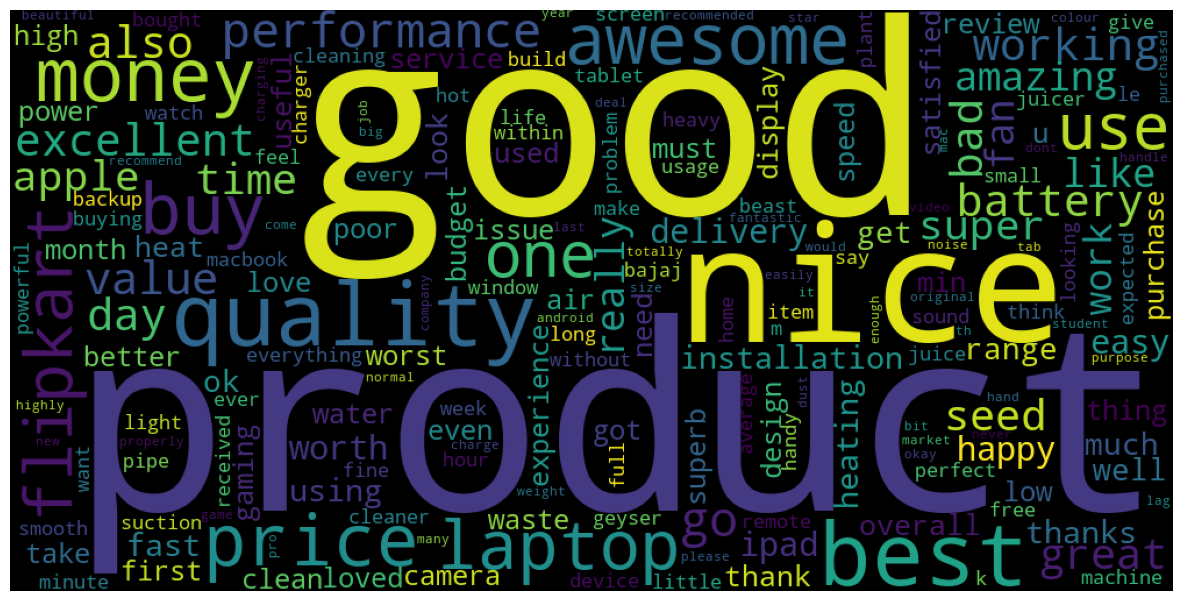

In [27]:
# Generate word cloud from the frequency distributed of words
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(fdist1)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

* As per above wordcloud we can read the most popular words while giving feedback of the product. In addition to that, customer mostly uses word like Product, good, nice quality, best, price which are more positive text.

In [28]:
#convert disctionery into dataframe
data = pd.DataFrame(fdist1.items(), columns=['Words','counts'])

In [29]:
#sort data by count to see top most words used in the feedback of product
data.sort_values("counts", ascending=False)

,Words,counts
19,good,4474
9,product,4265
34,nice,1920
18,quality,1025
27,best,1019
...,...,...
2905,craziest,1
2908,privacy,1
2910,bindly,1
2912,analysis,1


In [30]:
# create a list of our conditions on Rate column 
conditions = [
    (df['Rate'] >= 1) & (df['Rate'] <= 2),
    (df['Rate'] > 3) & (df['Rate'] <= 5),
    (df['Rate'] == 3)
    ]


In [31]:
# create a list of the values we want to assign for each condition
values = ['Negative', 'Positive', 'Neutral']

In [32]:
## create a new column and use np.select to assign values to it using our lists as arguments
df['Sentiment'] = np.select(conditions, values)

In [33]:
# display updated DataFrame
df.head()

,ProductName,Price,Rate,Review,Summary,Sentiment
0,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Excellent,A goo show case thanks to Flipkart,Positive
1,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Perfect product!,Awesome,Positive
2,@Home by nilkamal Walton Engineered Wood TV En...,11999,1,Terrible product,Don't bay this one.,Negative
3,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Great product,Excellent,Positive
4,@Home by nilkamal Walton Engineered Wood TV En...,11999,5,Perfect product!,Excellent product..... Fully satisfied,Positive


In [34]:
# create a loop to cleaning & mining the words
corpus=[]
 
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  review = [lemtizer.lemmatize(word) for word in review if not word in stop_words]
  review = ' '.join(review)
  corpus.append(review)

In [35]:
#import library to countverctorization from sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420, ngram_range=(2,2))

In [36]:
# Transform the corupus list 1 and 0 and store into X variable. And also assigne pridicting column into y varible.
X = cv.fit_transform(corpus)
y = df.Sentiment

In [37]:
# Import RandomForestclassifier to classification of sentiment analysis
from sklearn.ensemble import RandomForestClassifier

In [38]:
# set the perameter of RandomForestclassifier
# n_estimators= The required number of trees in the Random Forest. The default value is 10. 
# We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

randomclassfiier = RandomForestClassifier(n_estimators=200, criterion='entropy')

In [39]:
# Import train_test_split function from sklearn.model_selection library.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [40]:
# Import Multinomialn Naive Base Classification from sklearn library and Fitting the MultinomialNB algorithm to the training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [41]:
# Fitting the Random Forest algorithm to the training set
randomclassfiier.fit(X=X_train,y=y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [42]:
# predict the test datat using predict function
y_pred = classifier.predict(X_test)
ry_pred = randomclassfiier.predict(X_test)
 
#Creating the Confusion Matrix

# Import confusion matrix , accuary score and classification report to evaluate the results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
rcm = confusion_matrix(y_test,ry_pred)
print(cm)
print('Multinomial Naive Bayes classifier Accuracy'," ", accuracy_score(y_test, y_pred))
print("-------------------------------------------------\n")

print(rcm)
print('Randomforest Classifier Accuracy \t ','   ',accuracy_score(y_test,ry_pred))
print("-------------------------------------------------")


[[ 274    1  196]
 [   0   37  227]
 [   0   13 3085]]
Multinomial Naive Bayes classifier Accuracy   0.885990086094443
-------------------------------------------------

[[ 274    0  197]
 [   0   37  227]
 [   0    1 3097]]
Randomforest Classifier Accuracy 	      0.8891207931124445
-------------------------------------------------


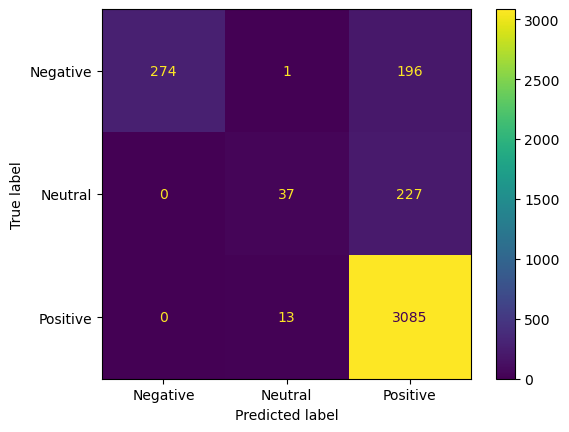

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
    
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()

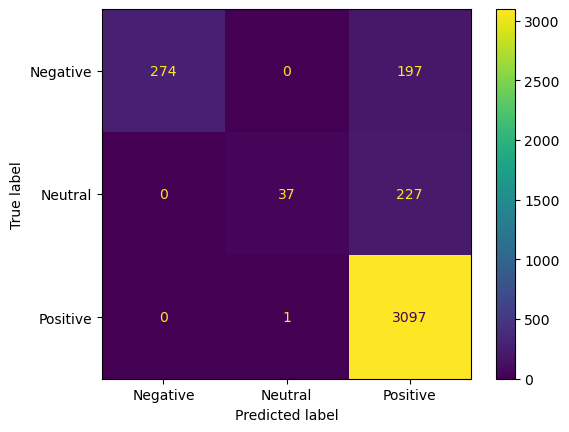

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, ry_pred)
plt.show()

> #### The above result is the matrix result for the test set. We can check that there is a minimum number of incorrect predictions without the Overfitting issue except for the Neutral sentiment category. We will get different results by changing the number of trees in the classifier.

In [43]:
# print classfication report using classification report function
print('Multinomial Naive Bayes classifier:\n',classification_report(y_test, y_pred))

Multinomial Naive Bayes classifier:
               precision    recall  f1-score   support

    Negative       1.00      0.58      0.74       471
     Neutral       0.73      0.14      0.23       264
    Positive       0.88      1.00      0.93      3098

    accuracy                           0.89      3833
   macro avg       0.87      0.57      0.63      3833
weighted avg       0.88      0.89      0.86      3833



#### Overall acuracy of prediction correct sentiment is 0.88 which is significant result of the model

In [44]:
# print classfication report using classification report function
print('Randomforest Classifier:\n',classification_report(y_test,ry_pred))

Randomforest Classifier:
               precision    recall  f1-score   support

    Negative       1.00      0.58      0.74       471
     Neutral       0.97      0.14      0.25       264
    Positive       0.88      1.00      0.94      3098

    accuracy                           0.89      3833
   macro avg       0.95      0.57      0.64      3833
weighted avg       0.90      0.89      0.86      3833



### Both the model give same results of accuray, hence either one model is acceptable for this sentiment analysis

In [49]:
df.groupby('Sentiment')['Sentiment'].count()

Sentiment
Negative    1478
Neutral      743
Positive    9392
Name: Sentiment, dtype: int64

**** Naïve Bayes assumes that the occurrence of a certain feature is independent of the occurrence of other features.It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features.

**** It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

---
****Random Forest is a classifier that uses many decision trees on different subsets of the provided dataset and averages the results to increase the dataset's predicted accuracy. Instead than depending on a single decision tree, the random forest uses forecasts from each tree and predicts the result based on the votes of the majority of predictions.


**** Higher accuracy and overfitting are prevented by the larger number of trees in the forest.

---
-> Based on the identified patterns and extracted knowledge, we improve remote area delivery as musch as speedy way; and secondly we can significantly improve installation of product which aid to convert from Neutral sentiment to Positive sentiment. 

-> However, more number of customer can be satisfied by providing reasonable price, improving customer services specifically in remote area and resolving the customer complain.

----


-> In reference to text mining application and  analysis techniques, text mining can assist someone go through massive volumes of data and zero down on the particular words and statistics they want. This provides analysts with a better foundation to work with and company owners with a clearer picture of the outcome of their actions.

-> Moreover, Data mining techniques and tools enable enterprises to predict future trends and make more-informed business decisions.
